# List of Contents
### 01. Importing Libraries
### 02. Importing Dataframes
### 03. Visualizations
>#### Bar Charts
>#### Histograms
>#### Scatterplot
>#### Line Chart
>#### Sampling Data

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Dataframes

In [2]:
#path= pathway to project folder
path= r'/Users/alexmendrin/Documents/Career Foundry/Data Immersion/Achievement 4/InstaCart Basket Analysis'

In [4]:
#latest version of orders_products_merged dataframe
ords_prods_merged= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_3.pkl'))

In [6]:
ords_prods_merged.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_frequency,order_frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,9.0,Mid-range product,Regular Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,9.0,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,9.0,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,9.0,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,9.0,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


# 03. Visualizations

## Bar Charts

<AxesSubplot:>

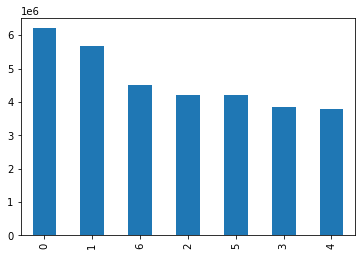

In [7]:
ords_prods_merged['orders_day_of_the_week'].value_counts().plot.bar()

<AxesSubplot:>

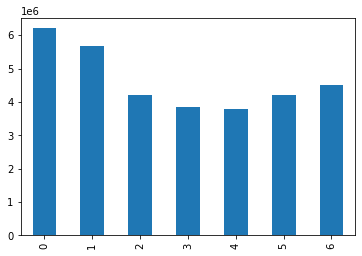

In [8]:
#sort_index=sort the bars according to their index order (rather than largest to smallest)
ords_prods_merged['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

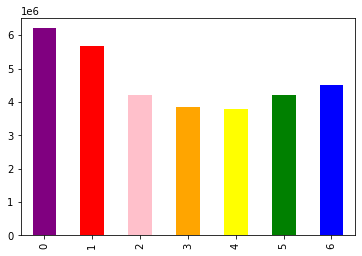

In [9]:
#add color to bar chart
ords_prods_merged['orders_day_of_the_week'].value_counts().sort_index().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

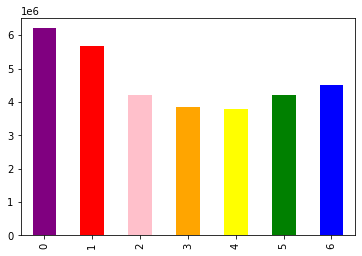

In [10]:
#save bar chart in memory
bar= ords_prods_merged['orders_day_of_the_week'].value_counts().sort_index().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

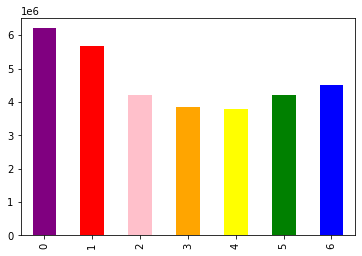

In [12]:
bar.figure

In [13]:
#export to computer as image file
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

## Histograms

<AxesSubplot:ylabel='Frequency'>

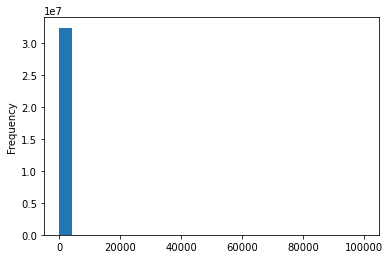

In [15]:
ords_prods_merged['prices'].plot.hist(bins=25)

In [17]:
#integrity checks
ords_prods_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [18]:
ords_prods_merged['prices'].mean()

11.980225638467232

In [19]:
ords_prods_merged['prices'].median()

7.4

In [20]:
ords_prods_merged['prices'].max()

99999.0

## Scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

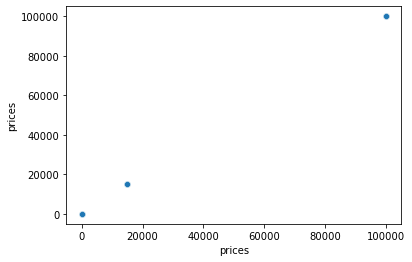

In [21]:
sns.scatterplot(x='prices', y='prices', data= ords_prods_merged)

In [22]:
#values above a certain threshold (above the 'normal' price of a supermarket item, $100)
ords_prods_merged.loc[ords_prods_merged['prices']>100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_frequency,order_frequency_flag
10030345,912404,17,12,2,14,5.0,False,21553,5,0,...,14900.0,High-range product,Regular Days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,False,21553,3,1,...,14900.0,High-range product,Regular Days,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,...,14900.0,High-range product,Regular Days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,False,21553,3,1,...,14900.0,High-range product,Busiest Days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,False,21553,9,0,...,14900.0,High-range product,Busiest Days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,...,99999.0,High-range product,Busiest Days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,...,99999.0,High-range product,Busiest Days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,...,99999.0,High-range product,Slowest Days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,...,99999.0,High-range product,Slowest Days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [24]:
#mark apparent outliers as missing
ords_prods_merged.loc[ords_prods_merged['prices']>100, 'prices']= np.nan

In [25]:
#check that replacement was successful
ords_prods_merged['prices'].max()

25.0

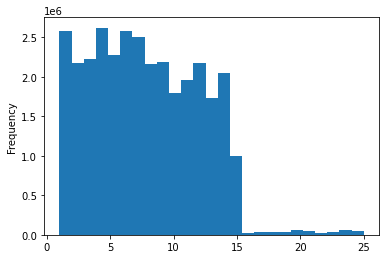

In [27]:
#new histogram
hist= ords_prods_merged['prices'].plot.hist(bins=25)

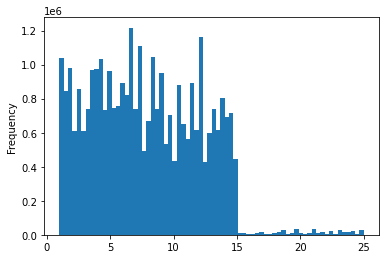

In [29]:
hist_2= ords_prods_merged['prices'].plot.hist(bins= 70)

In [30]:
#export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices'))

In [31]:
#export histogram 2
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_2_prices'))

## Line Charts

In [32]:
#subset of 2 million rows
df= ords_prods_merged[:2000000]

## Sampling Data

In [35]:
#create a list holding true/false values to test np.random.rand() <=0.7
np.random.seed(4)
dev= np.random.rand(len(ords_prods_merged)) <=0.7

In [36]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [37]:
#store 70% of the sample in the big dataframe
big= ords_prods_merged[dev]

In [38]:
#store 30% of the sample in the small dataframe
small= ords_prods_merged[~dev]

In [40]:
len(ords_prods_merged)

32404859

In [41]:
len(big) + len(small)

32404859

In [43]:
#subset with only prices and order_dow from small subset
df_2= small[['orders_day_of_the_week', 'prices']]

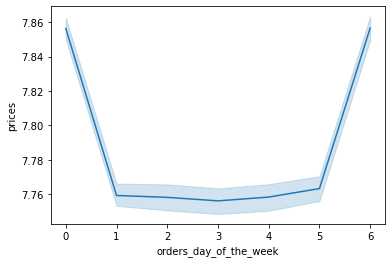

In [44]:
#create lineplot
line=sns.lineplot(data= df_2, x='orders_day_of_the_week', y='prices')

In [47]:
#export line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_sample_prices_orders_dow.png'))